In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier



# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
# Modelling Helpers :

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate


# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report
from sklearn import metrics

print("Setup complete...")

Setup complete...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv')

In [ ]:
data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


<Axes: >

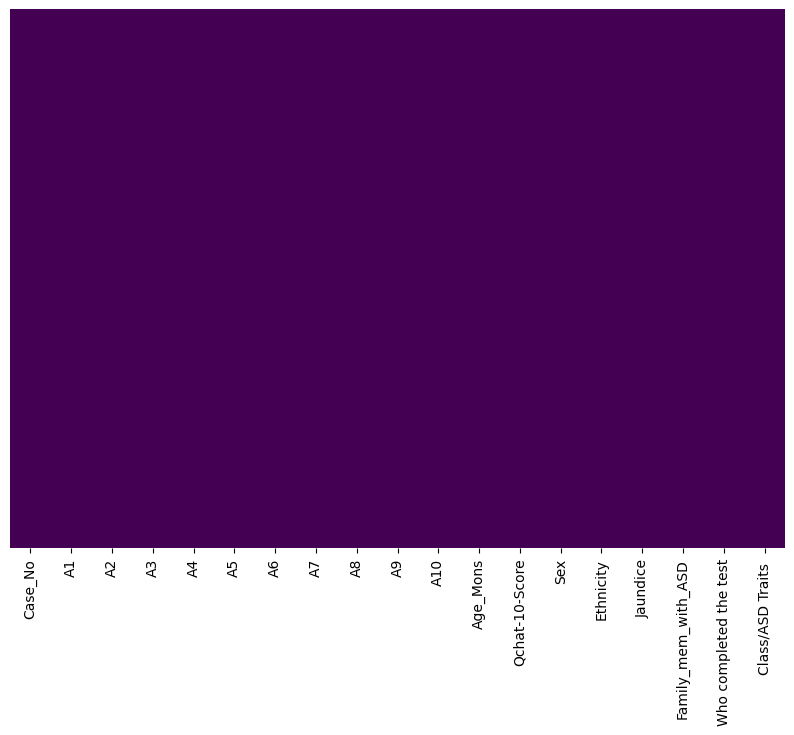

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [ ]:
data.replace("?",np.nan,inplace=True)

<Axes: >

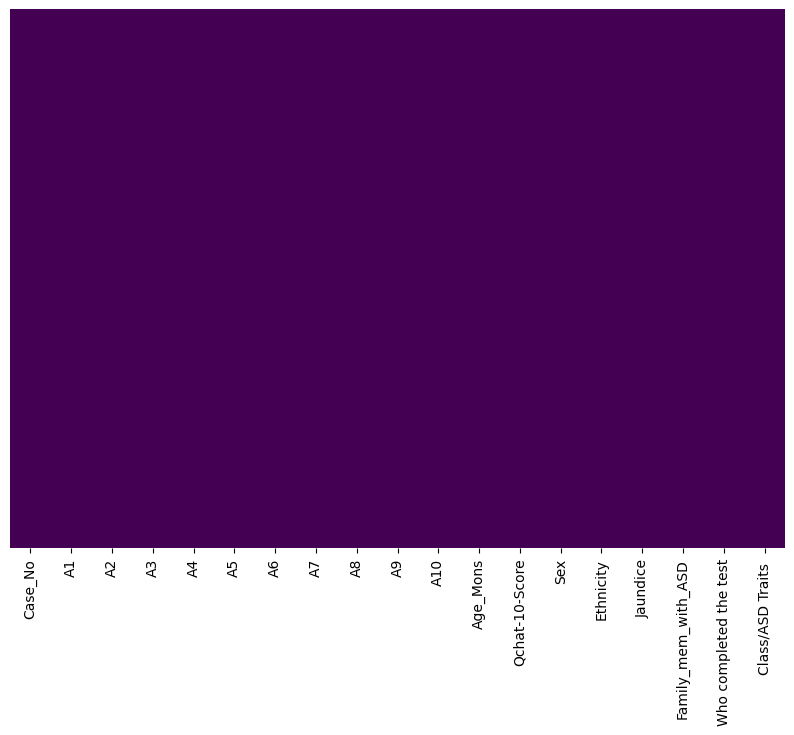

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.isnull(),cmap="viridis",cbar=False,yticklabels=False)

In [ ]:
data.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
data.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
data.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

<Axes: >

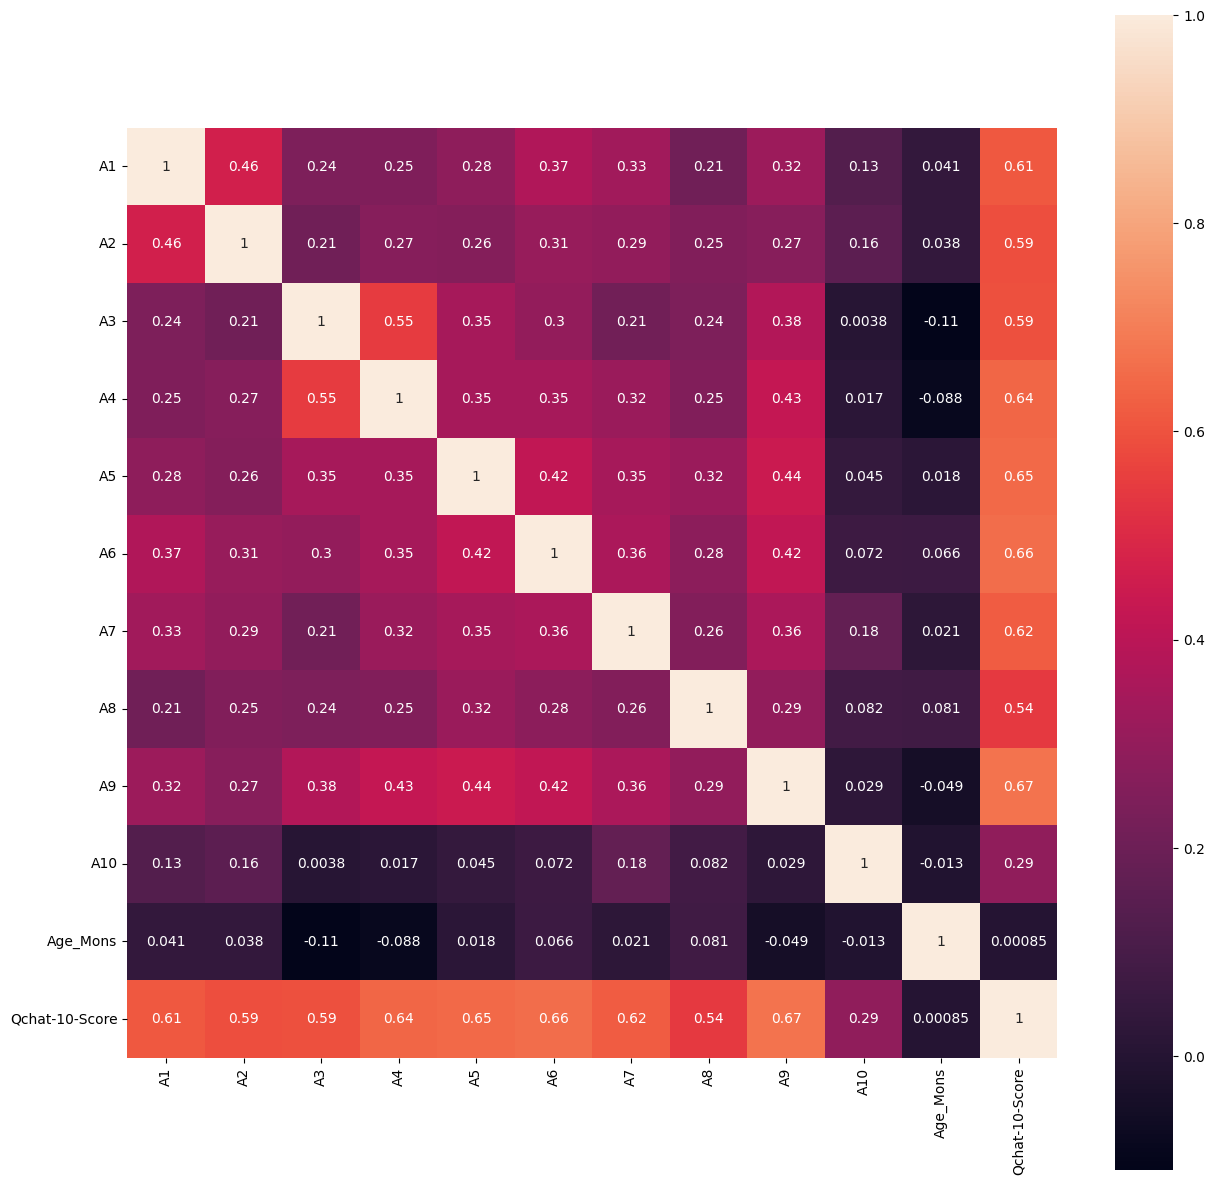

In [ ]:
corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

<Axes: xlabel='Ethnicity', ylabel='count'>

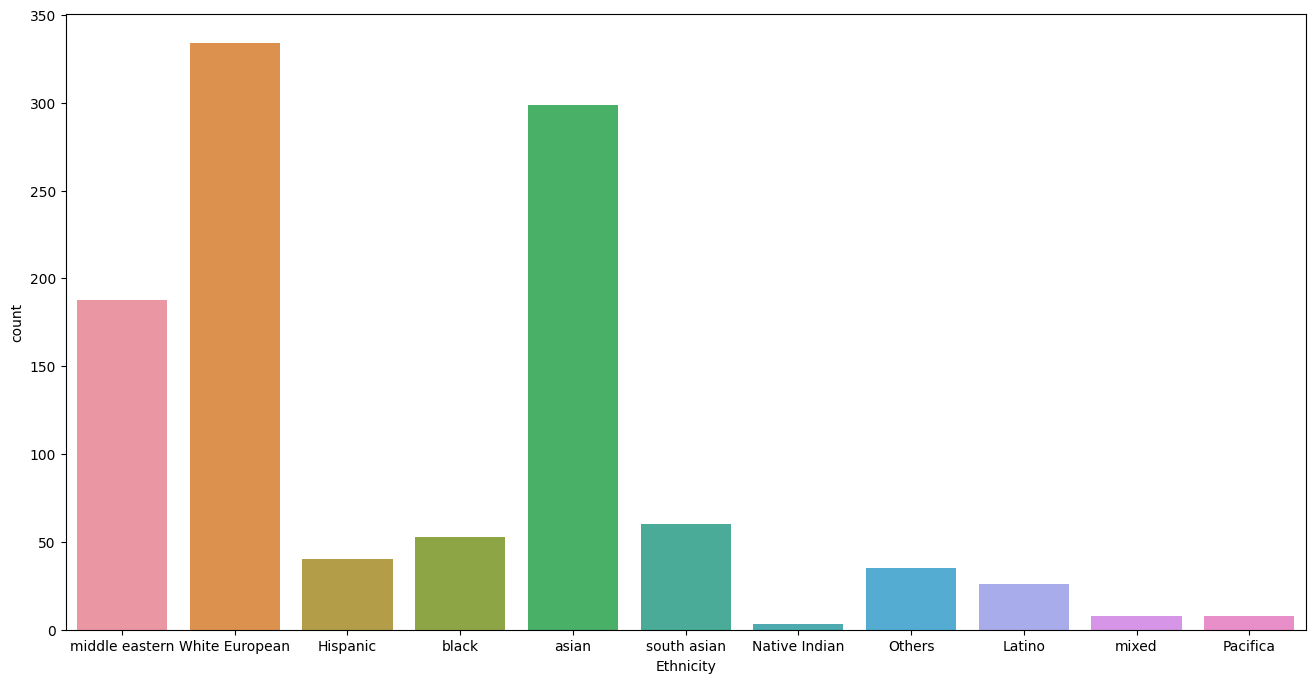

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = data)

In [ ]:
data['Age_Mons'].min()

12

In [ ]:
data['Age_Mons'].max()

36

In [ ]:
data.drop('Qchat-10-Score', axis = 1, inplace = True)

In [ ]:
data.drop(['Ethnicity'],axis=1,inplace=True)
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,f,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,m,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,m,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,m,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,f,no,yes,Yes


In [ ]:
sex=pd.get_dummies(data['Sex'],drop_first=True)
jaund=pd.get_dummies(data['Jaundice'],drop_first=True,prefix="Had_jaundice")
rel_autism=pd.get_dummies(data['Family_mem_with_ASD'],drop_first=True,prefix="Rel_had")
detected=pd.get_dummies(data['Class/ASD Traits '],drop_first=True,prefix="Detected")

In [ ]:
data=data.drop(['Sex','Jaundice','Family_mem_with_ASD','Class/ASD Traits '],axis=1)
data_featured=pd.concat([data, sex, jaund,rel_autism,detected],axis=1)
data_featured.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,m,Had_jaundice_yes,Rel_had_yes,Detected_Yes
0,0,0,0,0,0,0,1,1,0,1,28,0,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,0,1,1


<Axes: xlabel='Detected_Yes', ylabel='count'>

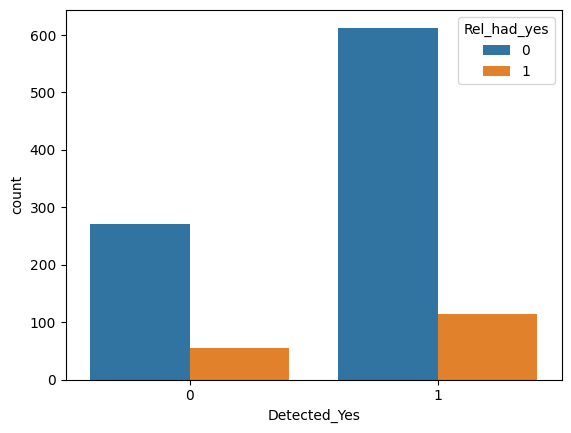

In [ ]:
sns.countplot(x='Detected_Yes',hue="Rel_had_yes",data=data_featured)

In [ ]:
X=data_featured[['A1', 'A2', 'A3', 'A4', 'A5', 'A6','A7', 'A8', 'A9', 'A10', 'Age_Mons', 'm',
       'Had_jaundice_yes', 'Rel_had_yes']]
y=data_featured['Detected_Yes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression()

In [ ]:
lgr=LogisticRegression()

In [ ]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
lgr.score(X_test,y_test)

1.0

In [ ]:
y_pred = lgr.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

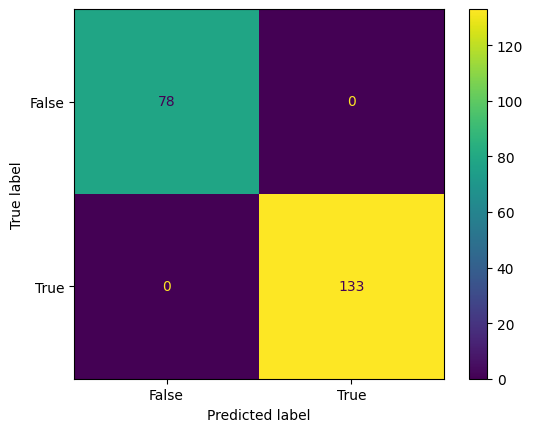

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        78
           1       1.00      1.00      1.00       133

    accuracy                           1.00       211
   macro avg       1.00      1.00      1.00       211
weighted avg       1.00      1.00      1.00       211



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_pred))

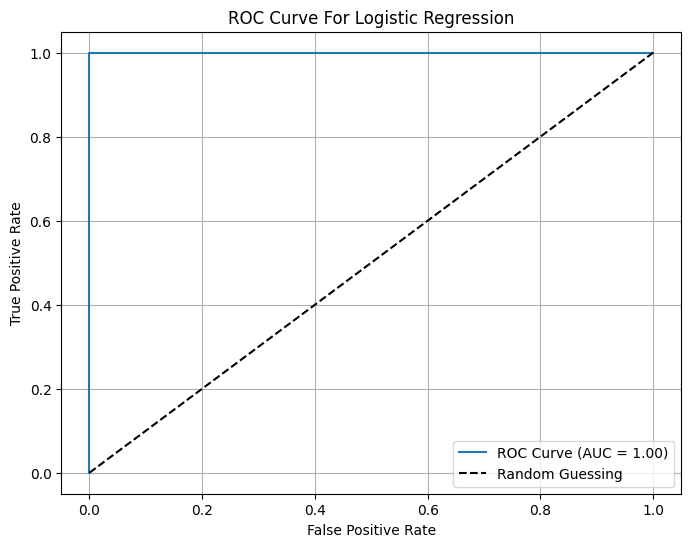

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Assuming you have trained the logistic regression model as lgr.fit(X_train, y_train)

# Calculate predicted probabilities for the positive class (class 1)
y_pred_prob = lgr.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve For Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)

# Display the ROC curve
plt.show()



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

# Load or prepare your dataset and target variable (X and y)

# Define the number of folds (K)
k = 5  # You can choose any value for K

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # You can change the random_state for reproducibility

# Initialize your Logistic Regression classifier
model = LogisticRegression(max_iter=1000)  # Create a LogisticRegression model, you can adjust max_iter

# Perform K-fold cross-validation and collect the results
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change 'accuracy' to the desired metric

# Print the results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation of accuracy: {np.std(scores)}')


Accuracy for each fold: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0
Standard deviation of accuracy: 0.0


In [ ]:
from sklearn.metrics import classification_report
from sklearn import metrics
import itertools

KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
knn.score(X_test,y_test)

0.95260663507109

In [ ]:
y_predk = knn.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predk)

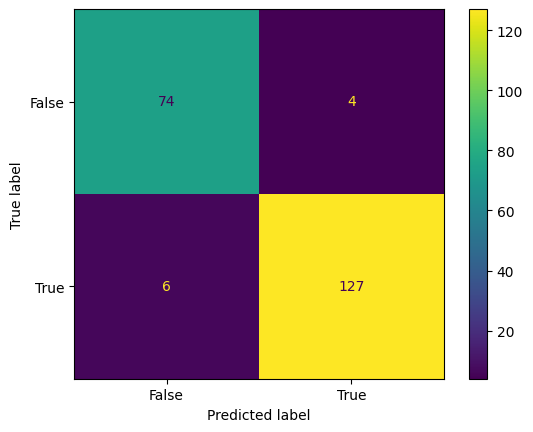

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        78
           1       0.97      0.95      0.96       133

    accuracy                           0.95       211
   macro avg       0.95      0.95      0.95       211
weighted avg       0.95      0.95      0.95       211



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_predk))

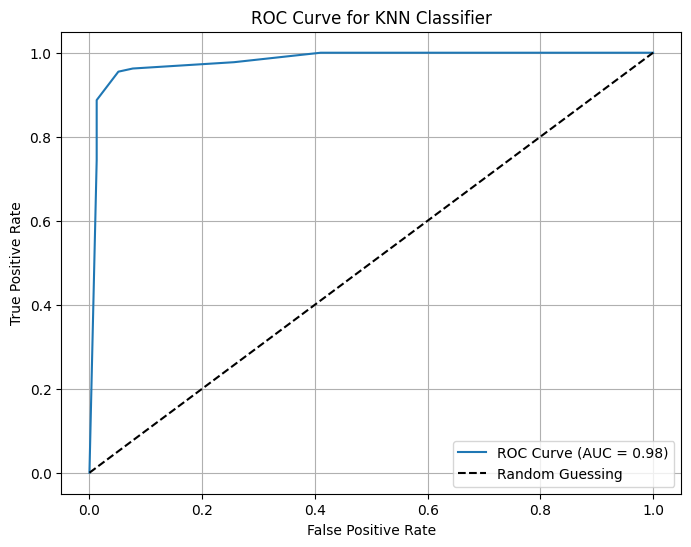

In [ ]:
# Calculate predicted probabilities for the positive class (class 1)
y_pred_prob_k = knn.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC AUC score
fpr_k, tpr_k, thresholds_k = roc_curve(y_test, y_pred_prob_k)
roc_auc_k = roc_auc_score(y_test, y_pred_prob_k)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_k, tpr_k, label=f'ROC Curve (AUC = {roc_auc_k:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc='lower right')
plt.grid(True)

# Display the ROC curve
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier  # Import the KNeighborsClassifier
import numpy as np

# Load or prepare your dataset and target variable (X and y)

# Define the number of folds (K)
k = 5  # You can choose any value for K

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # You can change the random_state for reproducibility

# Initialize your KNN classifier
model = KNeighborsClassifier(n_neighbors=7)  # Create a KNeighborsClassifier, you can adjust n_neighbors

# Perform K-fold cross-validation and collect the results
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change 'accuracy' to the desired metric

# Print the results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation of accuracy: {np.std(scores)}')


Accuracy for each fold: [0.95260664 0.91469194 0.97156398 0.9478673  0.91428571]
Mean accuracy: 0.9402031144211239
Standard deviation of accuracy: 0.022443807560612695


SVC

In [ ]:
svc = SVC()
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc.score(X_test,y_test)

0.7962085308056872

In [ ]:
y_preds = svc.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)

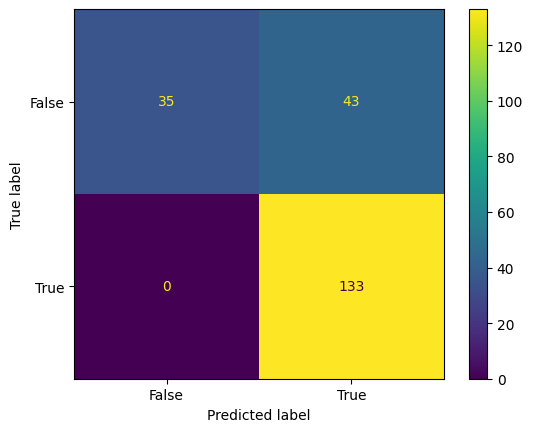

              precision    recall  f1-score   support

           0       1.00      0.45      0.62        78
           1       0.76      1.00      0.86       133

    accuracy                           0.80       211
   macro avg       0.88      0.72      0.74       211
weighted avg       0.85      0.80      0.77       211



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_preds))

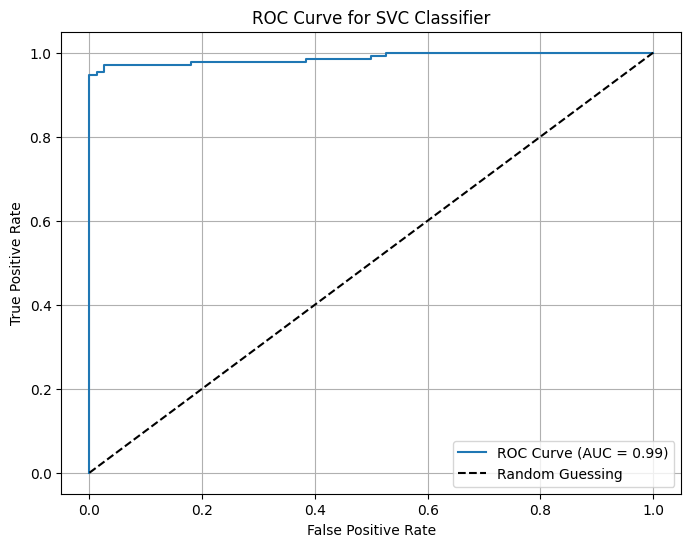

In [ ]:
# Calculate decision function scores (which act as probability estimates) for the positive class
y_scores = svc.decision_function(X_test)

# Calculate ROC curve and ROC AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVC Classifier')
plt.legend(loc='lower right')
plt.grid(True)

# Display the ROC curve
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np


# Define the number of folds (K)
k = 5  # You can choose any value for K

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=10)  # You can change the random_state for reproducibility

# Initialize your Support Vector Classifier (SVC)
model = SVC()

# Perform K-fold cross-validation and collect the results
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change 'accuracy' to the desired metric

# Print the results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation of accuracy: {np.std(scores)}')

Accuracy for each fold: [0.86255924 0.80094787 0.7535545  0.8957346  0.8952381 ]
Mean accuracy: 0.8416068607537802
Standard deviation of accuracy: 0.05594907504820937


Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import plot_tree

In [ ]:
dtc = tree.DecisionTreeClassifier(random_state=11)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
dtc.score(X_test,y_test)

0.9289099526066351

In [ ]:
y_preddt = dtc.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_preddt)

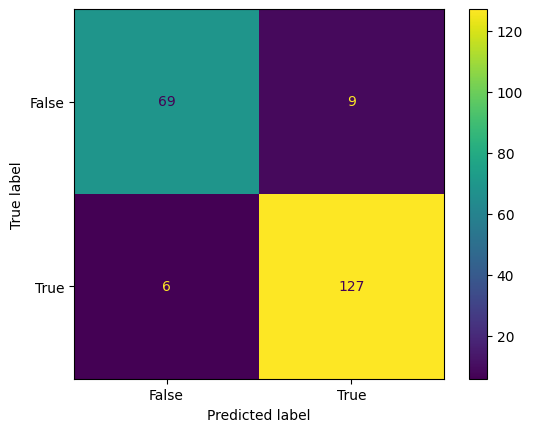

              precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.93      0.95      0.94       133

    accuracy                           0.93       211
   macro avg       0.93      0.92      0.92       211
weighted avg       0.93      0.93      0.93       211



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_preddt))

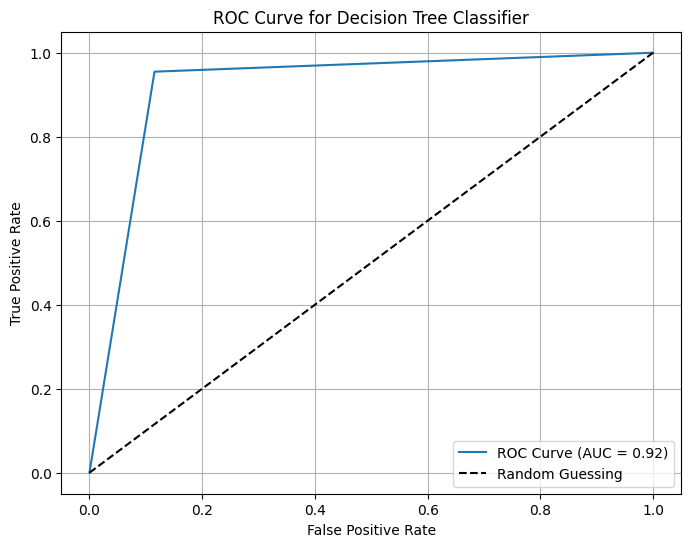

In [ ]:
# Calculate predicted probabilities for the positive class (class 1)
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC AUC score
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, y_pred_prob_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_pred_prob_dtc)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_dtc, tpr_dtc, label=f'ROC Curve (AUC = {roc_auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.grid(True)

# Display the ROC curve
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import the DecisionTreeClassifier

# Load or prepare your dataset and target variable (X and y)

# Define the number of folds (K)
k = 5  # You can choose any value for K

# Create a KFold object
kf = KFold(n_splits=k, shuffle=True, random_state=42)  # You can change the random_state for reproducibility

# Initialize your Decision Tree classifier
model = DecisionTreeClassifier()  # Create a DecisionTreeClassifier

# Perform K-fold cross-validation and collect the results
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')  # Change 'accuracy' to the desired metric

# Print the results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation of accuracy: {np.std(scores)}')


Accuracy for each fold: [0.96208531 0.90521327 0.92890995 0.8957346  0.93333333]
Mean accuracy: 0.9250552922590838
Standard deviation of accuracy: 0.023272367491936643


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_test,y_test)

0.9620853080568721

In [ ]:
y_predr = rf.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, y_predr)

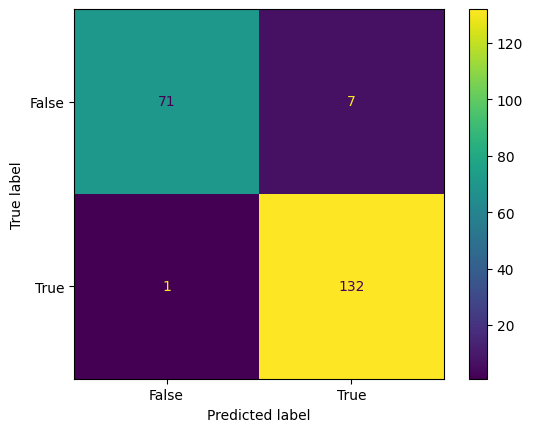

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.95      0.99      0.97       133

    accuracy                           0.96       211
   macro avg       0.97      0.95      0.96       211
weighted avg       0.96      0.96      0.96       211



In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
print(classification_report(y_test,y_predr))

In [ ]:
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=101)
model = RandomForestClassifier()

scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the results
print(f'Accuracy for each fold: {scores}')
print(f'Mean accuracy: {np.mean(scores)}')
print(f'Standard deviation of accuracy: {np.std(scores)}')


Accuracy for each fold: [0.96208531 0.95734597 0.95260664 0.95734597 0.97142857]
Mean accuracy: 0.960162491536899
Standard deviation of accuracy: 0.0063808826339719835


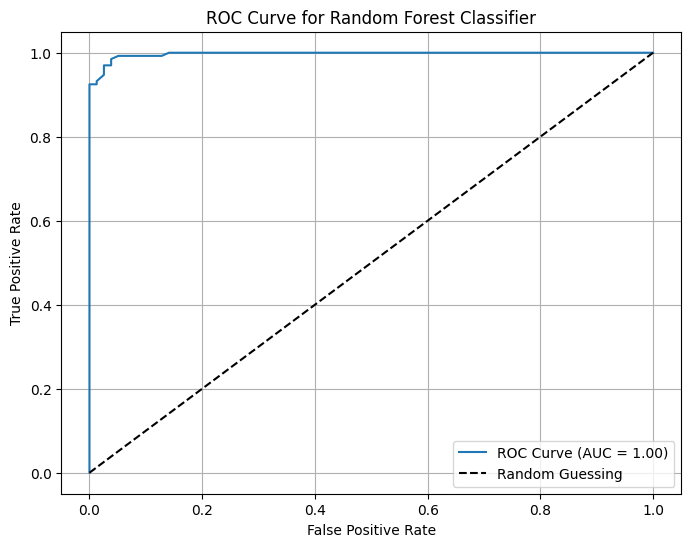

In [ ]:
# Calculate predicted probabilities for the positive class (class 1)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and ROC AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)

# Create an ROC curve plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC Curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc='lower right')
plt.grid(True)

# Display the ROC curve
plt.show()
